## Simulation Setup

### DGP
Using OpenML classification datasets. 
Agent: linear Thompson sampling. 


### Compared weighting:

- $h_t=1$;
- $h_t=t^{-\alpha/2}$;
- $h_t=t^{-\alpha}$;
- $h_t=t^{-2\alpha}$;


Evaluation metric: regret

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
from glob import glob
def read_files(file_name):
    files = glob(file_name)
    results = []
    for file in files:
        r = np.load(file)
        results.extend(r)
    return np.array(results)

In [4]:
results = read_files('results/dataset_*')

In [5]:
df = pd.DataFrame(data=results, columns=['dataset', 'T', 'T_test', 'K', 'p',
                                        'signal', 'noise_std', 'floor_decay',
                                        'policy_class', 'tree_depth', 'mask',
                                        'uniform', 'alpha_0.5', 'alpha', 'alpha_1.5', 'alpha_2', 'lvdl_worst'])


In [6]:
dataset = []
p = []
K = []
N = []
uniform_regret = []
lvdl_worst_regret = []
alpha_regret = []
alpha_half_regret = []
alpha_three_half_regret = []
alpha_twice_regret = []
uniform_regret_std = []
lvdl_worst_regret_std = []
alpha_regret_std = []
alpha_half_regret_std = []
for d, df_d in df.groupby('dataset'):
    if int(df_d['T'].unique()) < 1000:
        continue
    dataset.append(d)
    p.append(int(np.array(df_d['p'])[0]))
    K.append(int(np.array(df_d['K'])[0]))
    N.append(int(np.array(df_d['T'])[0]) + int(np.array(df_d['T_test'])[0]))
    uniform_regret.append(np.mean([float(i) for i in df_d['uniform']]))
    alpha_regret.append(np.mean([float(i) for i in df_d['alpha']]))
    alpha_half_regret.append(np.mean([float(i) for i in df_d['alpha_0.5']]))
    alpha_three_half_regret.append(np.mean([float(i) for i in df_d['alpha_1.5']]))
    alpha_twice_regret.append(np.mean([float(i) for i in df_d['alpha_2']]))
    lvdl_worst_regret.append(np.mean([float(i) for i in df_d['lvdl_worst']]))

uniform_regret = np.array(uniform_regret)
alpha_regret = np.array(alpha_regret)
alpha_half_regret = np.array(alpha_half_regret)
alpha_three_half_regret = np.array(alpha_three_half_regret)
alpha_twice_regret = np.array(alpha_twice_regret)
lvdl_worst_regret = np.array(lvdl_worst_regret)
uniform_regret_std = np.array(uniform_regret_std)
alpha_regret_std = np.array(alpha_regret_std)
alpha_half_regret_std = np.array(alpha_half_regret_std)
lvdl_worst_regret_std = np.array(lvdl_worst_regret_std)
p = np.array(p)
K = np.array(K)
N = np.array(N)

In [7]:
df['dataset'].unique()

array(['GAMETES_Epistasis_2-Way_20atts_0_4H_EDM-1_1',
       'BNG_sick_nominal_1000000', 'waveform-5000', 'BNG_credit-a_',
       'Long', 'banknote-authentication', 'page-blocks', 'BNG_mushroom_',
       'BNG_trains_', 'cmc', 'artificial-characters',
       'Click_prediction_small', 'BNG_lymph_10000_10_', 'BNG_kr-vs-kp_',
       'skin-segmentation', 'BNG_lymph_nominal_1000000_', 'allrep',
       'mfeat-morphological', 'satellite_image', 'BNG_cmc_nominal_55296_',
       'BNG_lymph_', 'jungle_chess_2pcs_endgame_elephant_elephant',
       'BNG_kr-vs-kp_5000_10_', 'BNG_vehicle_nominal_1000000_', 'wilt',
       'BNG_credit-a_nominal_1000000_', 'BNG_labor_nominal_1000000_',
       'eye_movements', 'Satellite', 'ringnorm', 'mammography',
       'delta_ailerons', 'SEA_50_', 'BNG_credit-g_nominal_1000000_',
       'PhishingWebsites', 'BNG_breast-cancer_nominal_1000000_', 'splice',
       'pendigits', 'volcanoes-a1', 'texture',
       'BNG_hepatitis_nominal_1000000_', 'SEA_50000_', 'BNG_ionosphe

## Table 1: dataset characteristics

In [20]:
print("Feature size [<10, >=10 & <40, >=40]: ")
print([np.sum(p<10), np.sum((p>=10) & (p<40)), np.sum(p>=40)])
print("Number of classes [2, >=3 & <6, >=6]")
print([np.sum(K==2), np.sum((K>=3) & (K<6)), np.sum(K>=6)])
print("Sample size [<5k, >=5k & <20k, >=20k]")
print([np.sum(N<5000), np.sum((N>=5000) & (N<20000)), np.sum(N>=20000)])

Feature size [<10, >=10 & <40, >=40]: 
[24, 46, 12]
Number of classes [2, >=3 & <6, >=6]
[50, 21, 11]
Sample size [<5k, >=5k & <20k, >=20k]
[22, 20, 40]


## Table 2: summary statistics

In [30]:
weighting = ['h_t=1', 'h_t=t^{-alpha/2}', 'h_t=t^{-alpha}',   'h_t=t^{-2alpha}']
for i, w in zip([uniform_regret, alpha_half_regret, alpha_regret,  alpha_twice_regret],
             weighting):
    print( f"{w}: mean {np.mean(i)} & median {np.median(i)}")
a = [uniform_regret, alpha_half_regret, alpha_regret,  alpha_twice_regret]
_, count = np.unique(np.argmin(a, axis=0), return_counts=True)
print("")
print("#datasets on which the weighting peaks performance")
print(list(zip(weighting, count)))

h_t=1: mean 0.31308955476343264 & median 0.22513753836317135
h_t=t^{-alpha/2}: mean 0.3065276869834341 & median 0.2193016251657668
h_t=t^{-alpha}: mean 0.3006259706833088 & median 0.21545819900303115
h_t=t^{-2alpha}: mean 0.3533332334317858 & median 0.28120455089227203

#datasets on which the weighting peaks performance
[('h_t=1', 5), ('h_t=t^{-alpha/2}', 10), ('h_t=t^{-alpha}', 64), ('h_t=t^{-2alpha}', 3)]


## Figure 3 

In [11]:
def plot(regret, name):
    n = len(regret)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3*3, 3.5*1))
    ax.flatten()[0].set_ylabel(name[0], fontsize=15)
    for i in range(n-1):
        ax.flatten()[i].set_xlabel(name[i+1], fontsize=15)
        maxi = np.amax([*regret[0], * regret[i+1]])
        u_r = np.array(regret[0]) / maxi
        l_r = np.array( regret[i+1]) / maxi
        ax.flatten()[i].plot(u_r[u_r < l_r], l_r[u_r < l_r], '.', markersize=10, alpha=0.55)
        ax.flatten()[i].plot(u_r[u_r >= l_r], l_r[u_r >= l_r], '.', markersize=10, alpha=0.55)
        ax.flatten()[i].plot([0,1.0],[0,1.0], '--k')
        ax.flatten()[i].set_xticks([0.,0.5, 1.0])
        ax.flatten()[i].set_yticks([0.,0.5, 1.0])
        if i > 0:
            ax.flatten()[i].set_yticklabels([])
    plt.tight_layout()

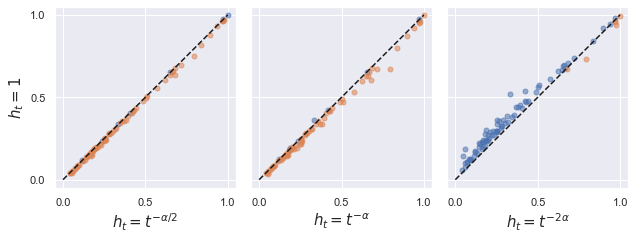

In [13]:
plot([uniform_regret, alpha_half_regret, alpha_regret,  alpha_twice_regret],
    [r'$h_t=1$', r'$h_t=t^{-\alpha/2}$', r'$h_t=t^{-\alpha}$',   r'$h_t=t^{-2\alpha}$'])
plt.savefig('classification.pdf',bbox_inches='tight')